# Understanding Why Borrowers Defaulted : Analysis of Prosper Loan Data.

### by Olatunji Olarewaju 

## Introduction
The dataset to be explored is a loan data from Prosper, a peer-to-peer lending platform,  consisting of 81 variables and 113,937 entries.  


## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.simplefilter("ignore")

%matplotlib inline

In [142]:
df = pd.read_csv("prosperLoanData.csv")
print(df.shape)
df.head(1)

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258


In [6]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [7]:
# Code to tidy the LoanOriginationQuarter column; remove (year)
# and convert the column to ordinal categorical variable
df["LoanOriginationQuarter"] = df["LoanOriginationQuarter"].str[:2]
order = ['Q1', 'Q2', 'Q3','Q4']
df["LoanOriginationQuarter"] = pd.Categorical(df['LoanOriginationQuarter'], ordered=False, categories= order) 
df["LoanOriginationQuarter"].dtypes


CategoricalDtype(categories=['Q1', 'Q2', 'Q3', 'Q4'], ordered=False)

In [8]:
pd.to_datetime(df["LoanOriginationDate"])
years = pd.DatetimeIndex(df['LoanOriginationDate']).year
years.unique().sort_values()


Int64Index([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014], dtype='int64', name='LoanOriginationDate')

###  Structure of the dataset

The are 113,937 entries and 81 variables, that spans a period 10 years, from 2005 to 2014. Each entry provides information about each Loan such as loan amount, interest rate paid, income range of the debtor and whether or not a debtor has defaulted.
The data is a mix of numeric and pandas object type. Some columns would need converting to the correct datatypes if they are to be correctly used in the exploration. 

However, the LoanOriginationQuarter column was tidied up and converted to categorical ordered type, ordered as [Q1, Q2, Q3, Q4]. 


### The main feature(s) of interest in the dataset

I intend to look at features/variables that may contribute to or cause Borrowers to default on loan repayment.
I expect that the information available about the borrower prior to taking the loan, such as debt-to-income-ratio, Home-ownership, loan purpose, available bank card credit and credit score, would indicate whether a borrower will default or otherwise. Other factors like interest rates and the loan duration could also affect loan repayment outcomes.

# Univariate exploration 
I will start the exploration by looking at the LoanStatus column.
> What proportion of the borrowers in the dataset have defaulted on loans?

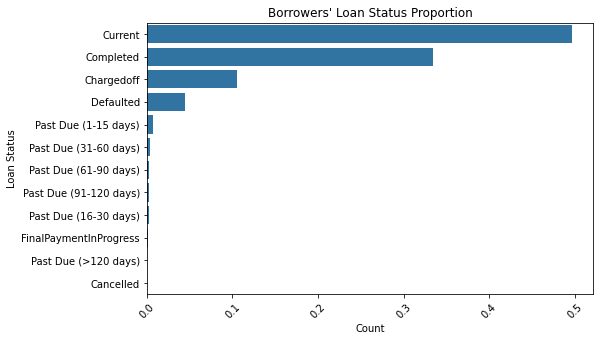

In [4]:
#Loan status
fig, ax = plt.subplots(figsize=(8, 5)) 
loan_status= df.LoanStatus.value_counts(normalize=True).reset_index()
loan_status.columns = ["Loan Status", "Count"]
sb.barplot(
    x= "Count",
    y= "Loan Status",
    data=loan_status, 
    ax=ax,
    color = sb.color_palette()[0])
plt.title("Borrowers' Loan Status Proportion")
plt.xticks(rotation =45);


#### Notes on Loan Status plot
50 percent of the loans are still being paid back. While 32% of the remaining debt have been paid in full, the other 18% have largely fallen behind on their payments or have been charged off, making it unlikely that they will ever be paid back.
It will be interesting to find out why these debtors may have defaulted later on in the investigation.

I therefore want to examine the justifications given by borrowers for taking out these loans.
> What explanation was given for taking out these loans?

In [127]:
# Conversion of the numeric values to their categorical values.
keys = ['Not Available', 'Debt Consolidation', 'Home Improvement','Business', 
        'Personal Loan', 'Student Use', 'Auto','Other', 'Baby&Adoption', 'Boat', 
        'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 
        'Large Purchases', 'Medical/Dental', 'Motorcycle', 'R$V', 'Taxes', 'Vacation', 'Wedding Loans']
dic = { i:keys[i] for i in np.arange(len(keys))}
#print(dic)
df['ListingCategory (numeric)'].replace(dic, inplace=True)


In [12]:
df['ListingCategory (numeric)']

0              Not Available
1           Home Improvement
2              Not Available
3                 Motorcycle
4           Home Improvement
                 ...        
113932    Debt Consolidation
113933                 Other
113934    Debt Consolidation
113935      Home Improvement
113936    Debt Consolidation
Name: ListingCategory (numeric), Length: 113937, dtype: object

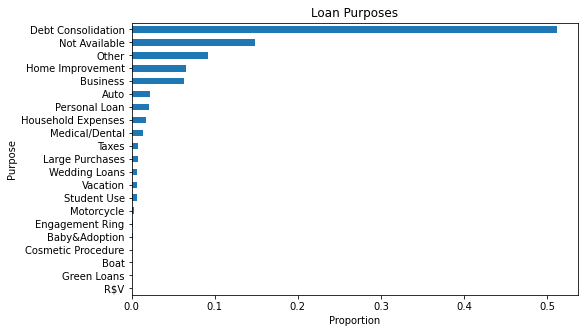

In [128]:
# Visualing the proportion of stated reasons for taking a loan 
fig, ax = plt.subplots(figsize=(8, 5)) 
df['ListingCategory (numeric)'].value_counts(normalize=True, ascending = True).plot(
    kind = "barh",
    ax=ax, 
    color = sb.color_palette()[0]
)
plt.title("Loan Purposes")
plt.xlabel("Proportion")
plt.ylabel("Purpose");


### Notes on loan justification

Nearly half of the borrowers took out loans for a variety of reasons, most commonly to finance a business, renovate their homes, and for other unspecified purposes.

However, the majority of the borrowers used Prosper loans to consolidate other debts. Consolidating debts entails taking out a new loan to settle existing debts. Interest rates, income, the debt-to-income ratio, and credit score are among the factors that contribute to debt consolidation decisions, according to [debt.org](https://www.debt.org/consolidation/).

These debtor-related information are included in the dataset and will be visualized later in the analysis. 
Let's first examine some more characteristics of the borrowers, such as their employment status, ownership of property, and the term of the loan.

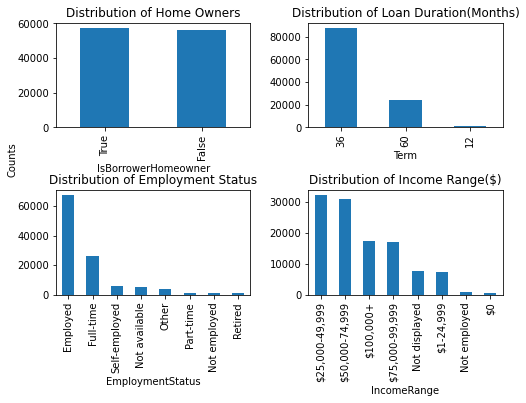

In [131]:
# Plot of distribution of loan duration,  home ownership,  employment status and income ranges of borrowers 
fig, ax = plt.subplots(2,2, figsize = [8,5])
default_color = sb.color_palette()[0]
#plt.tight_layout
fig.subplots_adjust(wspace=.3)
fig.subplots_adjust(hspace=.6)
status = ['IsBorrowerHomeowner', 'Term', 'EmploymentStatus', 'IncomeRange']
title = ["Home Owners", "Loan Duration(Months)", "Employment Status", "Income Range($)"] 
for stat, ax in zip(status, ax.flatten()):
    df[stat].value_counts().plot(kind="bar", ax= ax)
    ax.set_title(f"Distribution of {title[status.index(stat)]}")
    #ax.set_ylabel("Counts") 
    ax.set_xlabel(stat)
fig.text(0.04, 0.5, 'Counts', va='center', rotation='vertical');
    

### Notes home ownership,  term of Loan and employment status of debtors
Home ownership is nearly equally distributed among the debtors, with about 50% splits for those having and those not having. Due to the role that home ownership plays in the credit and loan system, this feature will be examined more closely later on in the exploration. 
The distribution of the loan duration fits perfectly into an earlier finding. Most debt consolidations are mid-to-long term loans with competitive interest rates. Hence, the 36 to 60 months duration shared the large junk of the term.
It is expected that debtors taking a new loan to consolidate an existing debt would have a steady income. This is the case with much of the debtors in our dataset. More than 80% of them are employed and on full-time. 

Next, I want to look at the interest rates of the loans, prosper score and credit score range.

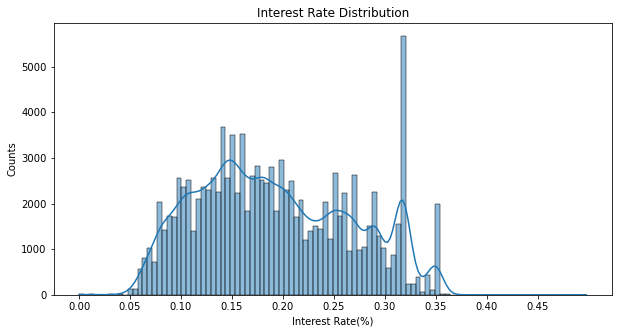

In [51]:
"""This code may require seaborn upgrade (pip install -U seaborn)"""
# Distribution of interest rate for the loans
fig, ax = plt.subplots(figsize=[10,5])
sb.histplot(data=df, x="BorrowerRate",ax=ax, kde=True)
plt.xticks(np.arange(0,0.5, 0.05))
plt.xlabel("Interest Rate(%)")
plt.ylabel("Counts")
plt.title("Interest Rate Distribution");


The distribution is slightly right skewed and having some prominent spikes at certain rates. These spikes could be associated with the loan amount taken by debtors. Perhaps, larger loan amount attracts higher interest rate.
In that case, I'll look at the distribution of loan amount taken by the debtors. 

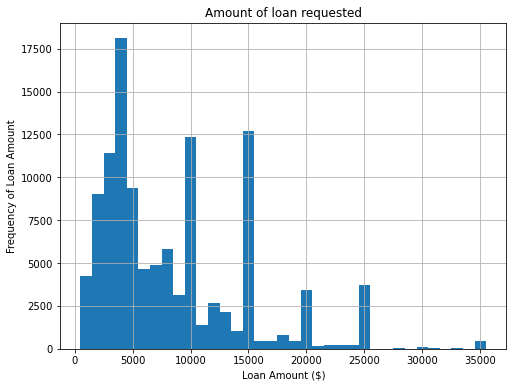

In [53]:
# Loan amount distribution 
fig, ax = plt.subplots(figsize=(8, 6)) 
binsize = 1000
bins = np.arange(500, df['LoanOriginalAmount'].max()+binsize, binsize)
df.LoanOriginalAmount.hist(bins=bins)
plt.xlabel("Loan Amount ($)")
plt.ylabel("Frequency of Loan Amount")
plt.title("Amount of loan requested");



The distribution showed the characteristic spikes patterns seen before in interest rate distribution, albeit, in some reverse directions. Indicating that fewer people are taking loans bigger than $5000, except at the spikes. 
The  relationship of both variables will further be investigated in the bivariate exploration, later.

To wrap up this section,I want to explore the 'scores', debt-to-income ratio and available-bank-card-credit.

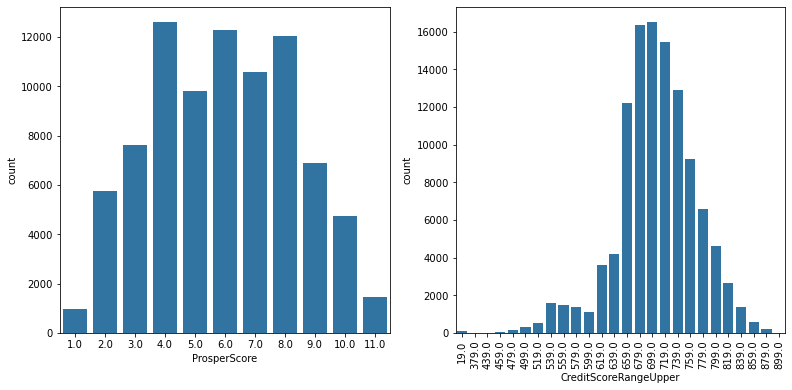

In [14]:
# Plot the debtor scores
fig, ax = plt.subplots(1,2, figsize = [13,6])
scores = ["ProsperScore", "CreditScoreRangeUpper"]
for score in scores:
    sb.countplot(x= score, 
                 data=df, 
                 color = sb.color_palette()[0],
                ax = ax[scores.index(score)])

plt.xticks(rotation = 90);



The number of people on the extremes of the scores are few and far more persons around the median or average of both scores. Both scores are likely to be strongly related as they share similar distribution. 

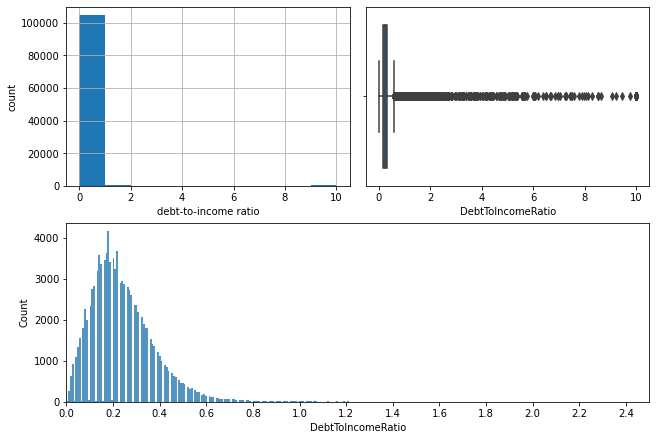

In [29]:
fig = plt.figure(figsize=(9,6), constrained_layout = True)
spec = fig.add_gridspec(2,2)

# The distribution of debt to income ratio
ax11 = fig.add_subplot(spec[0,0])
df.DebtToIncomeRatio.hist(ax=ax11)
plt.xlabel("debt-to-income ratio")
plt.ylabel("count")

# Boxplot to check the outliers distorting the distribution 
ax10 = fig.add_subplot(spec[0,1])
sb.boxplot(x = df.DebtToIncomeRatio, ax=ax10)

# DebtToIncomeRatio without the outliers 
"""This code may require seaborn upgrade (pip install -U seaborn)"""
ax0 = fig.add_subplot(spec[1,:]) 
sb.histplot(data=df, x="DebtToIncomeRatio", ax = ax0)
plt.xlim(0,2.5)
plt.xticks(np.arange(0, 2.5, 0.2));



Using the xlim function to limit values of the x-axis revealed the underlying distribution of the ratio - a strongly right skewed distribution. Much of the values greater than 1 are in the outlier plane. These outliers constitute a small fraction of the dataset which were excluded in the last plot.
The ratio may not help us understand why debtors default, since the majority of the debtors already have a low debt-to-income ratio irrespective of their repayment success.

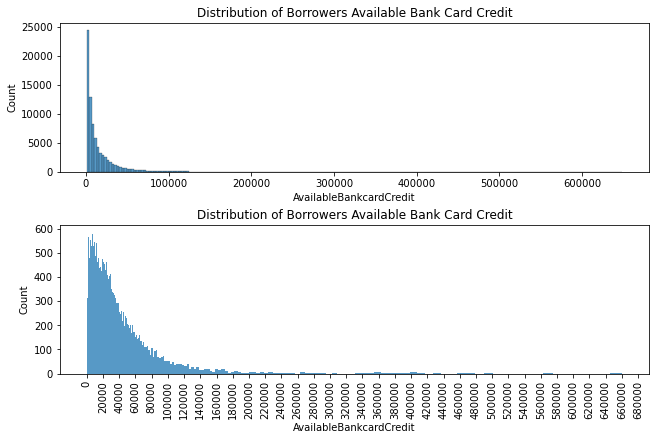

In [28]:
fig, ax = plt.subplots(2,1, figsize = [9,6], constrained_layout = True)

# Distribution of the AvailableBankcardCredit 
binsize = 3000
bins = np.arange(1000, df["AvailableBankcardCredit"].max()+binsize, binsize)
sb.histplot(x = df.AvailableBankcardCredit, bins=bins, ax = ax[0])
#df.AvailableBankcardCredit.hist(bins=bins, ax = ax[0])
ax[0].set_title("Distribution of Borrowers Available Bank Card Credit")

# available ban card credit distribution with log transformation 
binsize = .01
bins = 10**np.arange(.09, np.log10(df['AvailableBankcardCredit'].max())+ binsize, binsize)
sb.histplot(x = df.AvailableBankcardCredit, bins=bins, ax = ax[1])
plt.xticks(np.arange(0, 700000, 20000), rotation=90)
plt.title("Distribution of Borrowers Available Bank Card Credit");



Using the log transformation displayed the spread of the data much better. The plot is highly right skewed distribution with most of the debtors having less between $50,000 to $100,000 in card credit. It will be worth seeing if this difference makes a difference in loan repayment success. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The available bank card credit data required log transformation to gain a better insight into its distribution. 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The debt-to-income ratio data had several outliers which dipicted its plotted distribution as a single bar. These had to be excluded from the plot in order to get a better underlying distribution. Likewise, 

## Bivariate Exploration
I'll start off with looking at pairwise correlation of some of the variables seen previously in this investigation. 

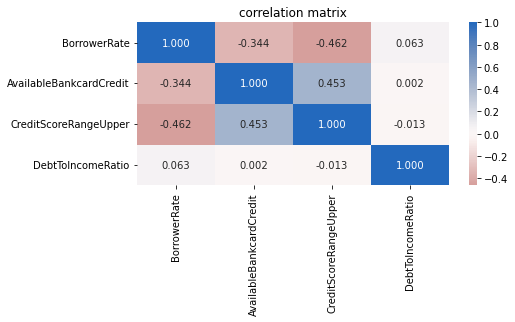

In [138]:
# correlation plot of numeric variables
numeric_vars = ['BorrowerRate','AvailableBankcardCredit', 'CreditScoreRangeUpper', 'DebtToIncomeRatio']
plt.figure(figsize = [7, 3])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);
plt.title("correlation matrix");


Only three of these variables showed significant correlations. The BorrowerRate (or interest rate) is determined by Prosper (the lender) and its apparent co-relations with AvailableBankcardCredit and CreditScoreRangeUpper suggest a strong influence on how it is determined. 

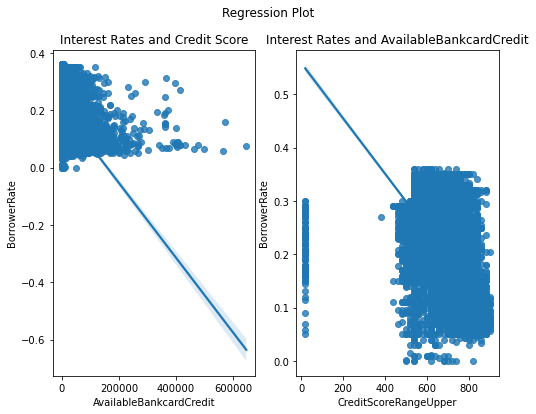

In [141]:
cor_plot = ["AvailableBankcardCredit", "CreditScoreRangeUpper"]
title = ["Interest Rates and Credit Score", "Interest Rates and AvailableBankcardCredit"]
fig, ax = plt.subplots(1,2, figsize=(8, 6))
for i in range(2):
    sb.regplot(data =df,
               y = "BorrowerRate",
               x = cor_plot[i],
               color = sb.color_palette()[0],
               ax = ax[i])
    ax[i].set_title(title[i])
fig.suptitle("Regression Plot");
          

Both the correlation matrix and regression plot above suggest that an increasing credit score correspond to a decrease in charged interest rate on Prosper loans. But because, it isn't a perfect relationship, an upper bound, limit or ranges may exist to which increasing credit score doesn't change interest rates by much.

Next, I want to look at how these variables correlate with representative subsets of the LoanStatus variable: "Completed", "Chargedoff" and "Defaulted".

In [27]:
# Subseting of the loan status
df_loanstatus = df[(df['LoanStatus']== 'Completed') | (df['LoanStatus']== 'Defaulted') | (df['LoanStatus']== 'Chargedoff')]
df_loanstatus["years"] = pd.DatetimeIndex(df_loanstatus['LoanOriginationDate']).year
df_loanstatus.LoanStatus.unique()


array(['Completed', 'Defaulted', 'Chargedoff'], dtype=object)

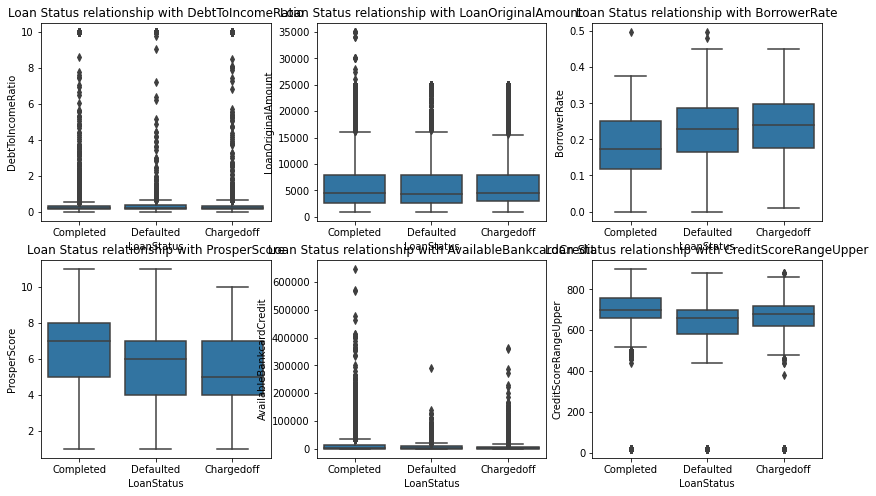

In [28]:
status_var = ["DebtToIncomeRatio","LoanOriginalAmount","BorrowerRate", "ProsperScore", "AvailableBankcardCredit","CreditScoreRangeUpper"]
# Plot of LoanStatus against some  variables 
fig, ax = plt.subplots(2, 3, figsize=(14,8)) 
plt.tight_layout
#fig.subplots_adjust(hspace=.3)
n = 0
for i in ax.flatten():
    sb.boxplot(ax=i, 
            data=df_loanstatus, 
            y= status_var[n], 
            x= "LoanStatus",
            color = sb.color_palette()[0]
            )
    i.set_title(f"Loan Status relationship with {status_var[n]}")
    #fig.suptitle('LoanStatus vs Some Variables') 
    n = n + 1

As earlier suspected, Debt-to-income ratio had minimal or no effect on repayment outcome of the loans. Likewise, the original loan amount had little impact. But, the real difference between debtors can clearly be noticed in the interest rate, proper score and credit score plot. Apparently, the average of these values varied significantly among debtors who completed payments and those who defaulted or are chargedoff. Simply, those who completed repayment generally enjoy relatively lower interest rates than other debtors.

Also, as seen previously, these values strongly correlate with interest rate. It's thus logical to dive more into factors that influences interest as it strongly impact loan repayment success. 

In [29]:
# Conversion of the numeric values to their categorical values.
keys = ['Not Available', 'Debt Consolidation', 'Home Improvement','Business', 'Personal Loan', 'Student Use', 'Auto','Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 'R$V', 'Taxes', 'Vacation', 'Wedding Loans']
dic = { i:keys[i] for i in np.arange(len(keys))}
#print(dic)
df_loanstatus['ListingCategory (numeric)'].replace(dic, inplace=True)


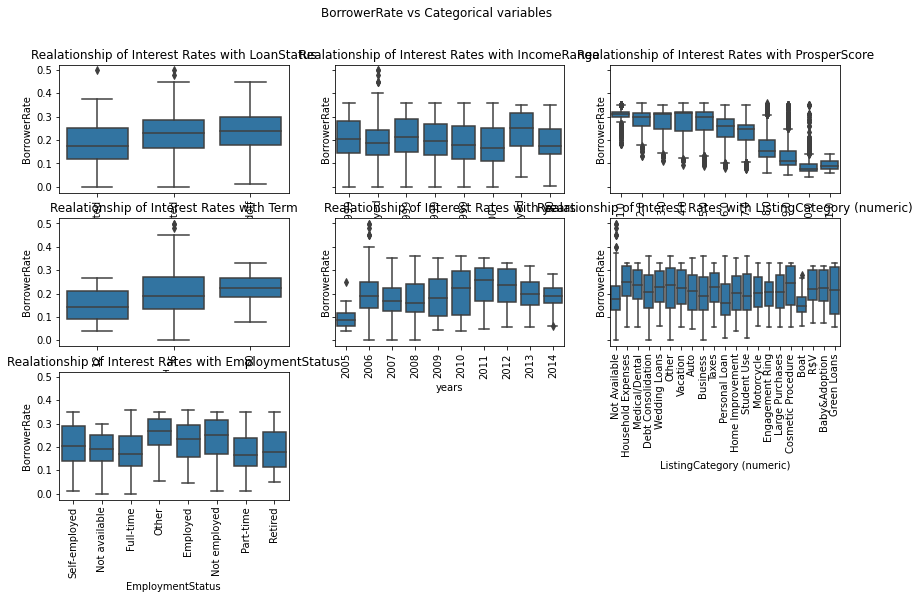

In [30]:
# Plot of BorrowerRate against some categorical  variables 
fig, ax = plt.subplots(3, 3, sharey=True, figsize=(14,8)) 
cat_plot = ["LoanStatus", "IncomeRange", "ProsperScore", "Term", "years", "ListingCategory (numeric)", "EmploymentStatus"]
plt.tight_layout
#fig.subplots_adjust(hspace=.3)
n = 0
for i in ax.flatten():
    if n < len(cat_plot):
        sb.boxplot(ax=i, 
                   data=df_loanstatus, 
                   y='BorrowerRate', 
                   x=cat_plot[n],
                   color = sb.color_palette()[0]
                  )
        i.tick_params(axis = 'x', rotation=90)
        i.set_title(f"Realationship of Interest Rates with {cat_plot[n]}")
        fig.suptitle('BorrowerRate vs Categorical variables') 
        n = n + 1

for ax in fig.axes:  
    if not bool(ax.has_data()): # check if something was plotted
        fig.delaxes(ax) # delete if nothing is plotted in the axes obj



Earlier, investigation showed that interest rates tend to decrease with increasing credit score, the same can also now be observed with Prosper Score. Suggesting that these two values are related. However, the inverse seems true for the loan durations or term.

Interest rates have also generally being higher, post 2005. However, a cyclic pattern of a 3-year fall followed by a 3-year rise in the average interest rate up to the 9th year,from 2006, when the average returned to the earliest rate can be observed. Though,this pattern can only be confirmed if more data are available.   

To close this section, I want to take a more closer look at the distribution of interest rates for the loan status subsets.

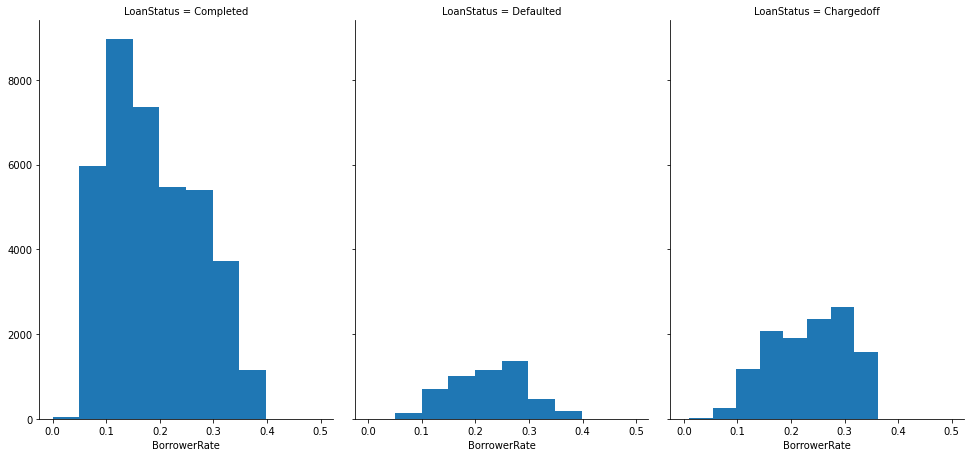

In [32]:
# Interest rate distribution for Completed, Chargedoff and Defaulted  status
g = sb.FacetGrid(df_loanstatus, 
                 col = "LoanStatus") 
g.map(plt.hist, "BorrowerRate")
g.fig.set_size_inches(14, 8);


The distribution is right skewed for the completed loans, with peak at around 10% interest rate. The other distributions are more or less left skewed with peaks at around 25-30% rates. This clearly show how interest rates could affect repayment outcomes. 


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The relationship between interest rates and category of debtors is the most prominent of the investigation in this part due to the bearing influence it has on repayment success. Interest itself appears to be determined by some other factors like credit scores, loan duration and income ranges or employment status.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

An interesting cyclic pattern could be noticed in the average interest rate in some 3 consecutive years. Though, this can't be concluded as an absolute pattern in the absence of data that spans similar years.



## Multivariate Exploration

Going further, I want to look at the relationships between loan status subsets and interest rates with those of other variables combined.

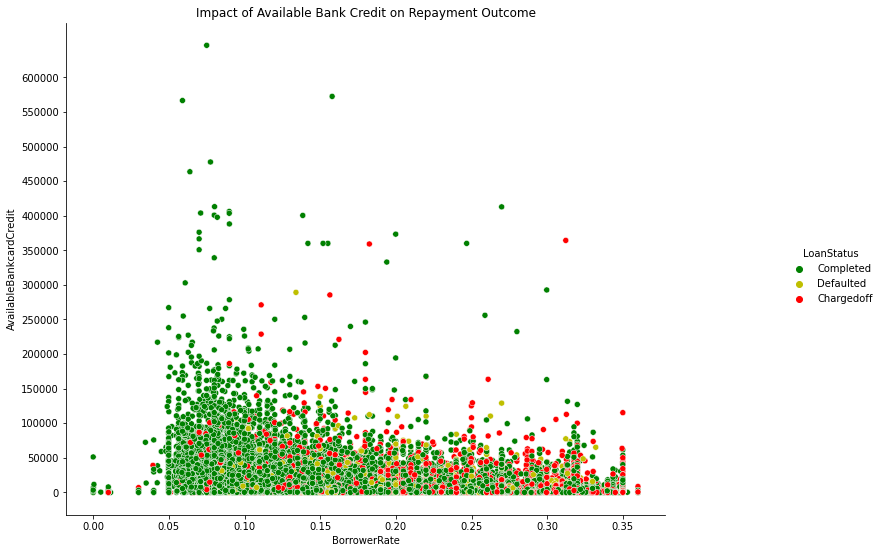

In [33]:
"""This code may require seaborn upgrade (pip install -U seaborn)"""
#fig, ax = plt.subplots(figsize=(14, 8)) 
credit=sb.relplot(data = df_loanstatus, 
           x = "BorrowerRate", 
           y = "AvailableBankcardCredit", 
           hue = "LoanStatus",
           palette=["g", "y", "r"])
plt.yticks(np.arange(0,650000, 50000))
plt.title("Impact of Available Bank Credit on Repayment Outcome")
credit.fig.set_size_inches(14, 8);


Generally, the plots suggest that the borrowers with less than 50,000 dollars  in available bank card credit as very likely to default on loans or be chargedoff. It is thus evident why interest rates are high for these category of debtors, at 20% or above. They are likely a high risk category of debtors. 

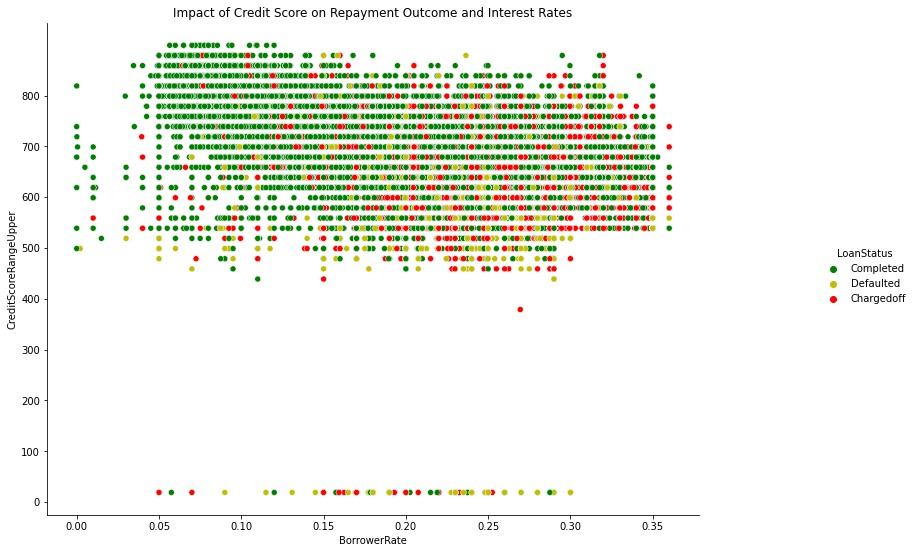

In [34]:
"""This code may require seaborn upgrade (pip install -U seaborn)"""
score = sb.relplot(data = df_loanstatus, 
           x = "BorrowerRate", 
           y = "CreditScoreRangeUpper", 
           hue = "LoanStatus",  
           palette=["g", "y", "r"])
plt.yticks(np.arange(0,900,100));
plt.title("Impact of Credit Score on Repayment Outcome and Interest Rates")
score.fig.set_size_inches(14, 8);


This further demonstrates the underlying factors for which borrowers default on loans. Much of the defaulters or chargedoff borrowers sb have comparatively lower credit score, usually less than 650. Nearly none of the borrowers with less than 100 credit score completely repaid back their loans. 

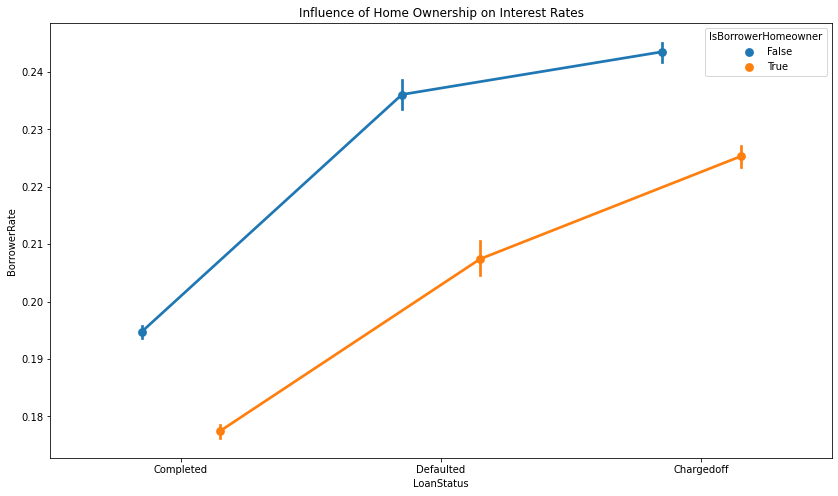

In [35]:
# Plot of relationship of home ownership with repayment outcome 
fig, ax = plt.subplots(figsize=(14, 8))
ax = sb.pointplot(data = df_loanstatus, 
                  x = 'LoanStatus', 
                  y = 'BorrowerRate', 
                  hue = 'IsBorrowerHomeowner',
                  ax=ax,
                  dodge = 0.3, linestyle = "")
plt.title("Influence of Home Ownership on Interest Rates");


Apparently, home owners had comparatively low interest on their loans. This wasn't obvious in an earlier plot that showed an almost even split of debtors who own homes and those that do not. 

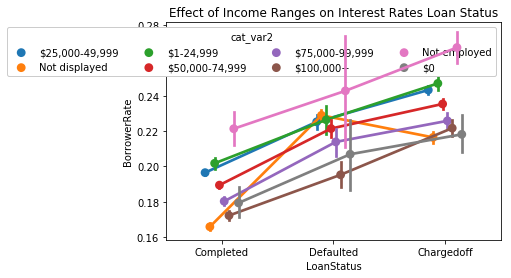

In [5]:
fig, ax = plt.subplots(figsize=(14, 8))
ax = sb.pointplot(data = df_loanstatus, 
                  x = 'LoanStatus', 
                  y = 'BorrowerRate', 
                  hue = 'IncomeRange',
                  ax=ax,
                  dodge = 0.3, linestyle = "")
ax.legend(loc = 1, ncol = 4, framealpha = 1, title = 'cat_var2')
plt.title("Effect of Income Ranges on Interest Rates Loan Status");


On one extremes are the not-employed with high interest rates and on the opposite spectrum are borrowers with 100,000 dollars and above in income. Generally, a higher income rates attracts reduced interest rates.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The impact of the credit score and bank card credit of the borrowers on interest rate charged on loans by Prosper became much clearer, as seen in plots of the variables. Earlier investigations revealed pairwise correlation of these variables but the most recent plots revealed much more the extent of the interplay between the variables and how the interest rates are determined for categories of borrowers.

### Were there any interesting or surprising interactions between features?

Interestingly, home owners had relatively lower interest charged on their loans. Earlier examination of home ownership was silent about a possible interaction with interest rate as the borrowers were almost evenly split into having and not. 

## Conclusions

Understanding why borrowers may default on loans could help investors and lenders avert losses on principal and save investment. During investigations, borrowers who defaulted on loans were found to be charged higher interest rates than most borrowers who completed payments on their loans. But the complete story is that, the borrowers who defaulted on loans were relatively high risk debtors. Generally, this category of borrowers have comparatively lower credit score and/or have a smaller bank card credit available to them. Interactions between interest rates and other variables like home ownership and income ranges are tenable but those of scores and credits amounts are most likelythe important.

In [27]:
# Use this 
!jupyter nbconvert Part_I_exploration_template.ipynb --to html


[NbConvertApp] Converting notebook Part_I_exploration_template.ipynb to html
[NbConvertApp] Writing 1234718 bytes to Part_I_exploration_template.html


In [ ]:
tar -czf archive.tar.gz foldername